## Задание 9

In [13]:
import numpy as np
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
# звгрузка данных
digits = load_digits()
X, y = digits.data, digits.target

# Нормализаця данных
X /= 16.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

10 перцептронов, класифицирующх цифры "эта цифра / другая цифра"

In [10]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01):
        self.weights = np.random.uniform(0, 1, input_size)
        self.bias = np.random.uniform(0, 1)
        self.learning_rate = learning_rate

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        return self.activation(np.dot(self.weights, x) + self.bias)

    def fit(self, X, y, epochs=10):
        for epoch in range(epochs):
            for i in range(len(X)):
                y_pred = self.predict(X[i])
                error = y[i] - y_pred
                # Обновление весов и смещения
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

# Создание и обучение 10 перцептронов для каждой цифры
perceptrons = [Perceptron(input_size=X.shape[1]) for _ in range(10)]

In [11]:
for digit in range(10):
    y_binary = (y_train == digit).astype(int)  # эта цифра / не эта цифра
    perceptrons[digit].fit(X_train, y_binary)

correct = 0
for i in range(len(X_test)):
    predictions = [perceptrons[d].predict(X_test[i]) for d in range(10)]
    predicted_label = np.argmax(predictions)
    if predicted_label == y_test[i]:
        correct += 1

print(f"Accuracy для 10 перцептронов: {correct / len(X_test):.2f}")

Accuracy для 10 перцептронов: 0.89


## Задание 10

In [15]:
# Обучение и оценка метода KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy для knn: {accuracy_knn:.2f}")

Accuracy для knn: 0.98


In [21]:
# Оценка отдельного перцептрона
# Используем конкретный перцептрон под номером, например, 0
perceptron_index = 0
correct_single = 0
for i in range(len(X_test)):
    y_pred = perceptrons[perceptron_index].predict(X_test[i])
    if (y_pred == 1 and y_test[i] == perceptron_index) or (y_pred == 0 and y_test[i] != perceptron_index):
        correct_single += 1

accuracy_single_perceptron = correct_single / len(X_test)
print(f"Accuracy для отдельного перцептрона №{perceptron_index}: {accuracy_single_perceptron:.2f}")


Accuracy для отдельного перцептрона №0: 0.99


## Здание 11

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
# данные
np.random.seed(42)
x = np.linspace(0, 1, 100).reshape(-1, 1)

# аппроксимация
def f1(x):
    return np.cos(2 * np.pi * x)

y1 = f1(x) + np.random.normal(0, 0.1, size=x.shape)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
mlp = MLPRegressor(max_iter=5000, random_state=42)

# варианты параметров
param_grid = {
    'hidden_layer_sizes': [(h1,) for h1 in range(1, 4)] + [(h1, h2) for h1 in range(1, 4) for h2 in range(1, 4)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.01, 0.001]
}

In [6]:
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())

# Лучшая модель
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

Best params: {'activation': 'tanh', 'hidden_layer_sizes': (3, 3), 'learning_rate_init': 0.01}
MSE: 0.01


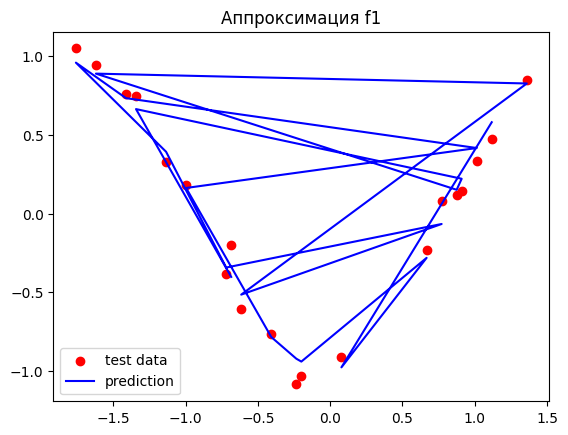

In [8]:
print(f"Best params: {grid_search.best_params_}")
print(f"MSE: {mse:.2f}")
plt.figure()
plt.scatter(X_test, y_test, color='red', label='test data')
plt.plot(X_test, y_pred, color='blue', label='prediction')
plt.title('Аппроксимация f1')
plt.legend()
plt.show()